# Markov Chain

# State

In [ ]:
import numpy as np
states = [0,1,2,3]
N_STATES = len(states)

# Transition probability

In [ ]:
P = np.empty((N_STATES, N_STATES))
l = 0.3
r = 0.3
s = 1-l-r

#             0   1   2   3
P[ 0, :] = [s+l,  r,  0,  0]
P[ 1, :] = [  l,  s,  r,  0]
P[ 2, :] = [  0,  l,  s,  r]
P[ 3, :] = [  0,  0,  l,s+r]

print(P)

[[0.7 0.3 0.  0. ]
 [0.3 0.4 0.3 0. ]
 [0.  0.3 0.4 0.3]
 [0.  0.  0.3 0.7]]


In [ ]:
np.random.seed(3)
state = np.random.choice(states)
print(state)

2


state:  2, next_state:  2, transition_prob: 0.39999999999999997
state:  2, next_state:  3, transition_prob: 0.3
state:  3, next_state:  2, transition_prob: 0.3
state:  2, next_state:  2, transition_prob: 0.39999999999999997
state:  2, next_state:  1, transition_prob: 0.3


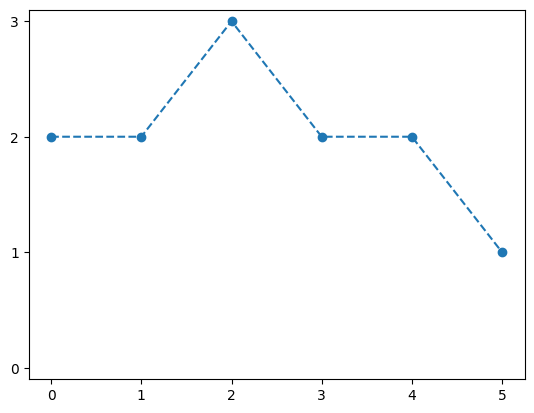

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(1)
num_steps = 5
msg = "state: {:2}, next_state: {:2}, transition_prob: {}"
state_history = []
state_history.append(state)
for _ in range(num_steps):
    next_state = np.random.choice(states, p=P[state, :])
    prob = P[state, next_state]
    print(msg.format(state, next_state, prob))
    state = next_state
    state_history.append(state)
fig, ax = plt.subplots()
ax.plot(state_history, 'o--')
ax.set_ylim([-0.1,3.1])
ax.set_yticks([0,1,2,3])
plt.show()

# MDP

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

In [ ]:
states = [0,1,2,3,4,5,6,7,8,9,10]
n_states = len(states)

In [ ]:
actions = [0,1,2,3] # left, right, up, down
n_actions = len(actions)

You move according to your action with 80
 probability.

Your move may have a left and right one click error with 10
 probability each.

If there is a barrier against your move, your move bounds back.

In [ ]:
# transition probabilities
P = np.empty((n_states, n_actions, n_states))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# Reward

-0.02 for each action.

If you reach the state 3, you win and get the final reward 1 in addition.

If you reach the state 6, you lose and get the final reward -1 in addition.

In [ ]:
# rewards
R = -0.02 * np.ones((n_states, n_actions, n_states))
R[:,:,3] = - 0.02 + 1
R[:,:,6] = - 0.02 - 1

# Discount factor

In [ ]:
gamma = 0.99

# Bad policy

In [ ]:
policy = np.empty((n_states, n_actions))
policy[0,:] = [0,1,0,0]
policy[1,:] = [0,1,0,0]
policy[2,:] = [0,1,0,0]
policy[3,:] = [0,1,0,0]
policy[4,:] = [0,0,0,1]
policy[5,:] = [0,1,0,0]
policy[6,:] = [0,1,0,0]
policy[7,:] = [0,1,0,0]
policy[8,:] = [0,1,0,0]
policy[9,:] = [0,0,1,0]
policy[10,:] = [0,0,1,0]

# Random policy

In [ ]:
policy = 0.25*np.ones((n_states, n_actions))

# Optimal policy

In [ ]:
policy = np.empty((n_states, n_actions))
policy[0,:] = [0,1,0,0]
policy[1,:] = [0,1,0,0]
policy[2,:] = [0,1,0,0]
policy[3,:] = [0,1,0,0]
policy[4,:] = [0,0,1,0]
policy[5,:] = [0,0,1,0]
policy[6,:] = [0,0,1,0]
policy[7,:] = [0,0,1,0]
policy[8,:] = [1,0,0,0]
policy[9,:] = [1,0,0,0]
policy[10,:] = [1,0,0,0]

In [ ]:
# policy
if 1:
    # bad policy
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 0:
    # random policy
    policy = 0.25*np.ones((n_states, n_actions))
elif 0:
    # optimal policy
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1:
    # optimal policy + noise
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((n_states, n_actions))
    policy = policy / np.sum(policy, axis=1).reshape((n_states,1))

Generate random samples from discrete distribution - np.random.choice

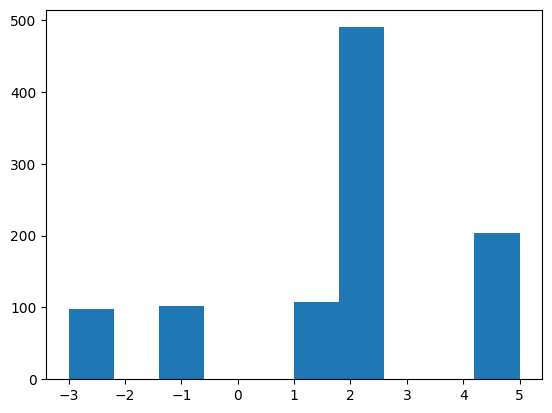

In [ ]:
x        = [ -3,  -1,   1,   2,   5]
pmf      = [0.1, 0.1, 0.1, 0.5, 0.2]
x_sample = np.random.choice(x, p=pmf, size=(1000,))

plt.hist(x_sample)
plt.show()

# Simulation of MDP : epoch 2

In [ ]:
# Simulation of MDP in Andrew Ng's Lecture 16

# import libraries
import numpy as np

# set parameters ###############################################################
epoch = 2
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_states = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
n_actions = len(actions)

# transition probabilities
P = np.empty((n_states, n_actions, n_states))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((n_states, n_actions, n_states))
R[:,:,3] = - 0.02 + 1
R[:,:,6] = - 0.02 - 1

# discount factor
gamma = 0.99

# policy
if 0:
    # bad policy
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 1:
    # random policy
    policy = 0.25*np.ones((n_states, n_actions))
elif 1:
    # optimal policy
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1:
    # optimal policy + noise
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((n_states, n_actions))
    policy = policy / np.sum(policy, axis=1).reshape((n_states,1))

# MDP simulation
msg = "s: {:2}, a: {}, r: {:5.2f}, s1: {:2}, done: {:1}, info: {}"
for _ in range(epoch):

    # indicate game is not over yet
    done = False

    # choose initial state randomly, not from 3 or 6
    s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])

    while not done:
        # choose action using current policy
        a = np.random.choice(actions, p=policy[s, :])

        # probaility of choosing action a under the current policy
        prob = policy[s, a]

        # choose next state using transition probabilities
        s1 = np.random.choice(states, p=P[s, a, :])

        # print current situation
        msg_print = msg.format(s, a, R[s, a, s1], s1, done, "prob "+str(prob))
        print(msg_print)

        if (s1 == 3):
            # if win,
            # ready to break while loop by letting done = True
            done = True
            # print final win comment
            print('final reward 1 obtained and win the game!')
        elif (s1 == 6):
            # if lose,
            # ready to break while loop by letting done = True
            done = True
            # print final lose comment
            print('final reward -1 obtained and lose the game!')
        else:
            # if game is not over,
            # continue playing game
            s = s1

s:  1, a: 3, r: -0.02, s1:  1, done: 0, info: prob 0.25
s:  1, a: 3, r: -0.02, s1:  1, done: 0, info: prob 0.25
s:  1, a: 2, r: -0.02, s1:  1, done: 0, info: prob 0.25
s:  1, a: 0, r: -0.02, s1:  0, done: 0, info: prob 0.25
s:  0, a: 0, r: -0.02, s1:  0, done: 0, info: prob 0.25
s:  0, a: 2, r: -0.02, s1:  0, done: 0, info: prob 0.25
s:  0, a: 3, r: -0.02, s1:  0, done: 0, info: prob 0.25
s:  0, a: 2, r: -0.02, s1:  0, done: 0, info: prob 0.25
s:  0, a: 3, r: -0.02, s1:  4, done: 0, info: prob 0.25
s:  4, a: 0, r: -0.02, s1:  4, done: 0, info: prob 0.25
s:  4, a: 2, r: -0.02, s1:  4, done: 0, info: prob 0.25
s:  4, a: 0, r: -0.02, s1:  4, done: 0, info: prob 0.25
s:  4, a: 3, r: -0.02, s1:  7, done: 0, info: prob 0.25
s:  7, a: 3, r: -0.02, s1:  7, done: 0, info: prob 0.25
s:  7, a: 0, r: -0.02, s1:  7, done: 0, info: prob 0.25
s:  7, a: 1, r: -0.02, s1:  4, done: 0, info: prob 0.25
s:  4, a: 2, r: -0.02, s1:  0, done: 0, info: prob 0.25
s:  0, a: 1, r: -0.02, s1:  1, done: 0, info: pr

# Simulation of MDP : epoch 1000

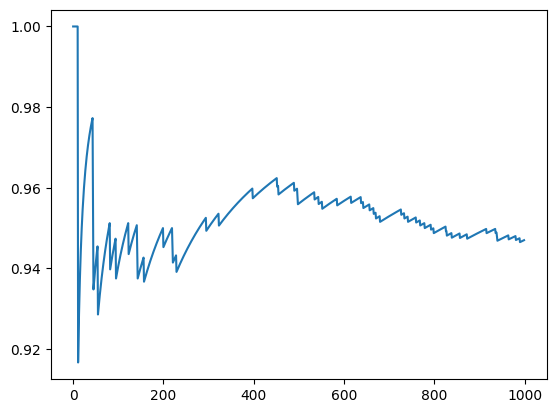

Success rate: 0.947


In [ ]:
# Simulation of MDP in Andrew Ng's Lecture 16 - Success rate of optimal policy

# import libraries
import numpy as np
import matplotlib.pyplot as plt

# set parameters ###############################################################
epoch = 1000
# set parameters ###############################################################

# state
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n_states = len(states)

# action
actions = [0, 1, 2, 3]  # left, right, up, down
n_actions = len(actions)

# transition probabilities
P = np.empty((n_states, n_actions, n_states))

#                0   1   2   3   4   5   6   7   8   9  10
P[ 0, 0, :] = [ .9,  0,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 1, :] = [ .1, .8,  0,  0, .1,  0,  0,  0,  0,  0,  0]
P[ 0, 2, :] = [ .9, .1,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 0, 3, :] = [ .1, .1,  0,  0, .8,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 1, 0, :] = [ .8, .2,  0,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 1, :] = [  0, .2, .8,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 2, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]
P[ 1, 3, :] = [ .1, .8, .1,  0,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 2, 0, :] = [  0, .8, .1,  0,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 1, :] = [  0,  0, .1, .8,  0, .1,  0,  0,  0,  0,  0]
P[ 2, 2, :] = [  0, .1, .8, .1,  0,  0,  0,  0,  0,  0,  0]
P[ 2, 3, :] = [  0, .1,  0, .1,  0, .8,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 3, 0, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 1, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 2, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]
P[ 3, 3, :] = [  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 4, 0, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 1, :] = [ .1,  0,  0,  0, .8,  0,  0, .1,  0,  0,  0]
P[ 4, 2, :] = [ .8,  0,  0,  0, .2,  0,  0,  0,  0,  0,  0]
P[ 4, 3, :] = [  0,  0,  0,  0, .2,  0,  0, .8,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 5, 0, :] = [  0,  0, .1,  0,  0, .8,  0,  0,  0, .1,  0]
P[ 5, 1, :] = [  0,  0, .1,  0,  0,  0, .8,  0,  0, .1,  0]
P[ 5, 2, :] = [  0,  0, .8,  0,  0, .1, .1,  0,  0,  0,  0]
P[ 5, 3, :] = [  0,  0,  0,  0,  0, .1, .1,  0,  0, .8,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 6, 0, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 1, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 2, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]
P[ 6, 3, :] = [  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 7, 0, :] = [  0,  0,  0,  0, .1,  0,  0, .9,  0,  0,  0]
P[ 7, 1, :] = [  0,  0,  0,  0, .1,  0,  0, .1, .8,  0,  0]
P[ 7, 2, :] = [  0,  0,  0,  0, .8,  0,  0, .1, .1,  0,  0]
P[ 7, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .9, .1,  0,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 8, 0, :] = [  0,  0,  0,  0,  0,  0,  0, .8, .2,  0,  0]
P[ 8, 1, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .2, .8,  0]
P[ 8, 2, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]
P[ 8, 3, :] = [  0,  0,  0,  0,  0,  0,  0, .1, .8, .1,  0]

#                0   1   2   3   4   5   6   7   8   9  10
P[ 9, 0, :] = [  0,  0,  0,  0,  0, .1,  0,  0, .8, .1,  0]
P[ 9, 1, :] = [  0,  0,  0,  0,  0, .1,  0,  0,  0, .1, .8]
P[ 9, 2, :] = [  0,  0,  0,  0,  0, .8,  0,  0, .1,  0, .1]
P[ 9, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0, .1, .8, .1]

#                0   1   2   3   4   5   6   7   8   9  10
P[10, 0, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0, .8, .1]
P[10, 1, :] = [  0,  0,  0,  0,  0,  0, .1,  0,  0,  0, .9]
P[10, 2, :] = [  0,  0,  0,  0,  0,  0, .8,  0,  0, .1, .1]
P[10, 3, :] = [  0,  0,  0,  0,  0,  0,  0,  0,  0, .1, .9]

# rewards
R = -0.02 * np.ones((n_states, n_actions, n_states))
R[:,:,3] = - 0.02 + 1
R[:,:,6] = - 0.02 - 1

# discount factor
gamma = 0.99

# policy
if 0:
    # bad policy
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,0,1]
    policy[5,:] = [0,1,0,0]
    policy[6,:] = [0,1,0,0]
    policy[7,:] = [0,1,0,0]
    policy[8,:] = [0,1,0,0]
    policy[9,:] = [0,0,1,0]
    policy[10,:] = [0,0,1,0]
elif 0:
    # random policy
    policy = 0.25*np.ones((n_states, n_actions))
elif 0:
    # optimal policy
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
elif 1:
    # optimal policy + noise
    # we use optimal policy with probability 1/(1+ep)
    # we use random policy with probability ep/(1+ep)
    ep = 0.1
    policy = np.empty((n_states, n_actions))
    policy[0,:] = [0,1,0,0]
    policy[1,:] = [0,1,0,0]
    policy[2,:] = [0,1,0,0]
    policy[3,:] = [0,1,0,0]
    policy[4,:] = [0,0,1,0]
    policy[5,:] = [0,0,1,0]
    policy[6,:] = [0,0,1,0]
    policy[7,:] = [0,0,1,0]
    policy[8,:] = [1,0,0,0]
    policy[9,:] = [1,0,0,0]
    policy[10,:] = [1,0,0,0]
    policy = policy + (ep/4)*np.ones((n_states, n_actions))
    policy = policy / np.sum(policy, axis=1).reshape((n_states,1))

# MDP simulation
simulation_history = []
for _ in range(epoch):

    # indicate game is not over yet
    done = False

    # choose initial state randomly, not from 3 or 6
    s = np.random.choice([0, 1, 2, 4, 5, 7, 8, 9, 10])

    while not done:
        # choose action using current policy
        a = np.random.choice(actions, p=policy[s, :])

        # choose next state using transition probabilities
        s1 = np.random.choice(states, p=P[s, a, :])

        if s1 == 3:
            # if game is over,
            # ready to break while loop by letting done = True
            # append end result to simulation_history
            done = True
            simulation_history.append(1.)
        elif s1 == 6:
            # if game is over,
            # ready to break while loop by letting done = True
            # append end result to simulation_history
            done = True
            simulation_history.append(0.)
        else:
            # if game is not over, continue playing game
            s = s1

history = np.cumsum(simulation_history) / (np.arange(epoch) + 1)
plt.plot(history)
plt.show()

print("Success rate: {}".format(history[-1]))

# Markov Chain - Continuing

In [20]:
import numpy as np

In [21]:
# MC with no end

# import numpy library to do vector algebra
import numpy as np

# define transition matrix
P = np.array([[0.3, 0.7], [0.2, 0.8]])
print("Trnasition Matrix:\n", P)

# define any starting solution to state probabilities
# Here we assume equal probabilities for all the states
S = np.array([0.5, 0.5])

# run through 10 iterations to calculate steady state
# transition probabilities
for i in range(10):
    S = np.dot(S, P)
    print("\nIter {0}. Probability vector S = {1}".format(i, S))


print("\nFinal Vector S={0}".format(S))

Trnasition Matrix:
 [[0.3 0.7]
 [0.2 0.8]]

Iter 0. Probability vector S = [0.25 0.75]

Iter 1. Probability vector S = [0.225 0.775]

Iter 2. Probability vector S = [0.2225 0.7775]

Iter 3. Probability vector S = [0.22225 0.77775]

Iter 4. Probability vector S = [0.222225 0.777775]

Iter 5. Probability vector S = [0.2222225 0.7777775]

Iter 6. Probability vector S = [0.22222225 0.77777775]

Iter 7. Probability vector S = [0.22222223 0.77777778]

Iter 8. Probability vector S = [0.22222222 0.77777778]

Iter 9. Probability vector S = [0.22222222 0.77777778]

Final Vector S=[0.22222222 0.77777778]


# Markov Chain - Episodic

In [22]:
# MC Episodic

# import numpy library to do vector algebra
import numpy as np

# define transition matrix
P = np.array([
    [0.3, 0.5, 0.2, 0.0],
    [0.1, 0.9, 0.0, 0.0],
    [0.4, 0, 0, 0.6],
    [0, 0, 0, 1]
])

print("Trnasition Matrix:\n", P)

# define any starting solution to state probabilities
# Here we assume equal probabilities for all the states
S = np.array([1, 0, 0, 0])

# run through 10 iterations to calculate steady state
# transition probabilities
for i in range(1000):
    S = np.dot(S, P)
    # print("\nIter {0}. Probability vector S = {1}".format(i, S))


print("\nFinal Vector S={0}".format(S))

Trnasition Matrix:
 [[0.3 0.5 0.2 0. ]
 [0.1 0.9 0.  0. ]
 [0.4 0.  0.  0.6]
 [0.  0.  0.  1. ]]

Final Vector S=[4.73405766e-09 2.84857504e-08 9.63092427e-10 9.99999966e-01]


# Markov Reward Process - Continuing

In [23]:
# MRP Continuing

# import numpy library to do vector algebra
import numpy as np

# define transition matrix
P = np.array([[0.3, 0.7], [0.2, 0.8]])
print("Trnasition Matrix:\n", P)

# define any starting solution to state probabilities
# Here we assume equal probabilities for all the states
S = np.array([0.5, 0.5])

# run through 10 iterations to calculate steady state
# transition probabilities
for i in range(10):
    S = np.dot(S, P)
    print("\nIter {0}. Probability vector S = {1}".format(i, S))

# steady state S
print("\nFinal Vector S={0}".format(S))

Trnasition Matrix:
 [[0.3 0.7]
 [0.2 0.8]]

Iter 0. Probability vector S = [0.25 0.75]

Iter 1. Probability vector S = [0.225 0.775]

Iter 2. Probability vector S = [0.2225 0.7775]

Iter 3. Probability vector S = [0.22225 0.77775]

Iter 4. Probability vector S = [0.222225 0.777775]

Iter 5. Probability vector S = [0.2222225 0.7777775]

Iter 6. Probability vector S = [0.22222225 0.77777775]

Iter 7. Probability vector S = [0.22222223 0.77777778]

Iter 8. Probability vector S = [0.22222222 0.77777778]

Iter 9. Probability vector S = [0.22222222 0.77777778]

Final Vector S=[0.22222222 0.77777778]
